In [122]:
# import usefull libraries for manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:

file_path = "/content/sample_data/Credit card transactions - Project - 2.csv"

# Load the DataFrame
df = pd.read_csv(file_path)

In [124]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574


In [125]:
df.tail()

,index,City,Date,Card Type,Exp Type,Gender,Amount
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",03-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174
26051,26051,"Hyderabad, India",19-Oct-13,Signature,Bills,M,184410


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [127]:
df.dtypes

,0
index,int64
City,object
Date,object
Card Type,object
Exp Type,object
Gender,object
Amount,int64


In [128]:
df.isnull().sum()

,0
index,0
City,0
Date,0
Card Type,0
Exp Type,0
Gender,0
Amount,0


In [129]:
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


In [130]:
df.shape

(26052, 7)

In [131]:
# Task 1 - (Top 5 Cities with Highest Spends and Their Contribution to Total Credit Card Spends)
city_spends = df.groupby('City')['Amount'].sum().reset_index()
total_spend = city_spends['Amount'].sum()
top_5_cities = city_spends.sort_values(by='Amount', ascending=False).head(5)
top_5_cities['Contribution (%)'] = (top_5_cities['Amount'] / total_spend) * 100
print(top_5_cities)

                      City     Amount  Contribution (%)
170  Greater Mumbai, India  576751476         14.153989
71        Bengaluru, India  572326739         14.045402
8         Ahmedabad, India  567794310         13.934172
126           Delhi, India  556929212         13.667533
267         Kolkata, India  115466943          2.833660


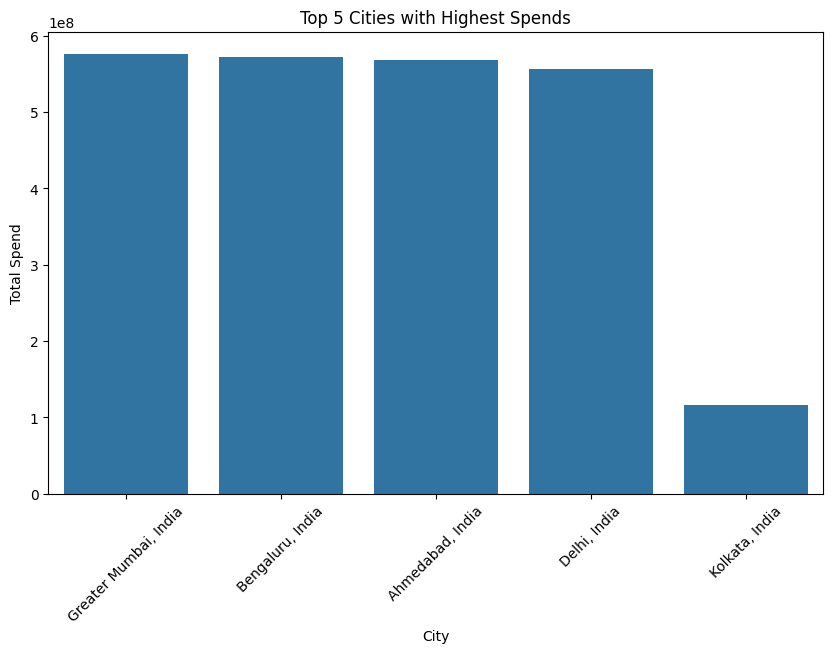

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Amount', data=top_5_cities)
plt.title('Top 5 Cities with Highest Spends')
plt.xlabel('City')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.show()

In [133]:
# Task-2 (Highest Spend Month and Amount for Each Card Type)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Month-Year'] = df['Date'].dt.to_period('M')
monthly_spends = df.groupby(['Card Type', 'Month-Year'])['Amount'].sum().reset_index()
highest_spend_per_card = monthly_spends.loc[monthly_spends.groupby('Card Type')['Amount'].idxmax()]
print(highest_spend_per_card)

    Card Type Month-Year    Amount
15       Gold    2015-01  55455064
30   Platinum    2014-08  57936507
42  Signature    2013-12  58799522
77     Silver    2015-03  59723549


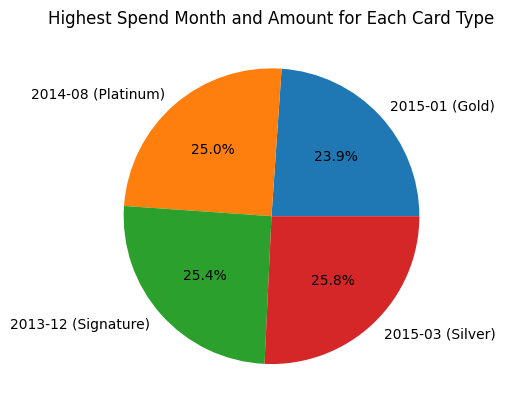

In [134]:
plt.pie(highest_spend_per_card['Amount'],labels=highest_spend_per_card.apply(lambda x: f"{x['Month-Year']} ({x['Card Type']})", axis=1),autopct='%1.1f%%')
plt.title('Highest Spend Month and Amount for Each Card Type')
plt.show()

In [135]:
# Task-3 (Print Transaction Details for Each Card Type with Spend > 100,000)
df['Cumulative Amount'] = df.groupby('Card Type')['Amount'].cumsum()
transactions_above_100k = df[df['Cumulative Amount'] > 100000]
transactions_above_100k_details = transactions_above_100k[['Card Type', 'Date', 'Amount', 'City', 'Gender', 'Cumulative Amount']]
print(transactions_above_100k_details)

       Card Type       Date  Amount                   City Gender  \
2         Silver 2014-08-27  101738       Bengaluru, India      F   
3      Signature 2014-04-12  123424  Greater Mumbai, India      F   
4           Gold 2015-05-05  171574       Bengaluru, India      F   
5         Silver 2014-09-08  100036           Delhi, India      F   
6           Gold 2015-02-24  143250           Delhi, India      F   
...          ...        ...     ...                    ...    ...   
26047     Silver 2014-06-22  128191         Kolkata, India      F   
26048  Signature 2014-08-03  246316            Pune, India      M   
26049     Silver 2015-01-16  265019       Hyderabad, India      M   
26050     Silver 2014-09-14   88174          Kanpur, India      M   
26051  Signature 2013-10-19  184410       Hyderabad, India      M   

       Cumulative Amount  
2                 101738  
3                 123424  
4                 254049  
5                 201774  
6                 397299  
...      

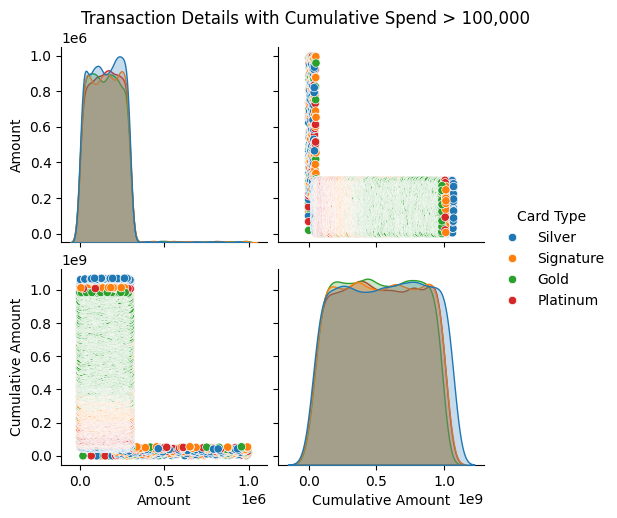

In [136]:
sns.pairplot(transactions_above_100k_details, hue='Card Type')
plt.suptitle('Transaction Details with Cumulative Spend > 100,000', y=1.02)
plt.show()

In [137]:
# Task-4 (City with Lowest Percentage Spend for Gold Card Type)
gold_data = df[df['Card Type'] == 'Gold']
gold_city_spends = gold_data.groupby('City')['Amount'].sum().reset_index()
gold_total_spend = gold_city_spends['Amount'].sum()
gold_city_spends['Percentage Spend'] = (gold_city_spends['Amount'] / gold_total_spend) * 100
lowest_gold_spend_city = gold_city_spends.sort_values(by='Percentage Spend').head(1)
print(lowest_gold_spend_city)

               City  Amount  Percentage Spend
99  Dhamtari, India    1416          0.000144


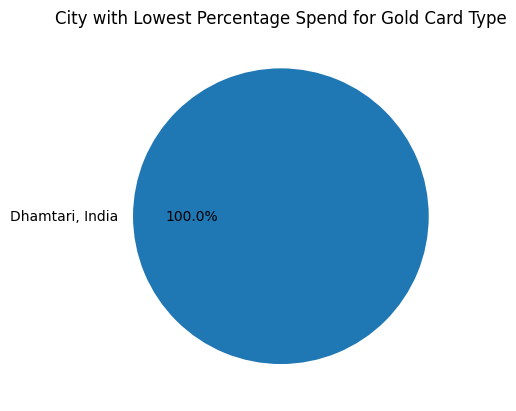

In [138]:
plt.pie(lowest_gold_spend_city['Percentage Spend'],labels=lowest_gold_spend_city['City'],autopct='%1.1f%%')
plt.title('City with Lowest Percentage Spend for Gold Card Type')
plt.show()

In [139]:
# Task-5 (Highest, Lowest, and Equal Contribution of Spends by Expense Type)
expense_type_summary = df.groupby('Exp Type')['Amount'].agg(['max', 'min', 'mean']).reset_index()
print(expense_type_summary)

        Exp Type     max   min           mean
0          Bills  998077  1026  178627.899370
1  Entertainment  299936  1061  152548.831583
2           Food  299837  1018  150965.405272
3           Fuel  299905  1038  150111.436371
4        Grocery  299920  1005  151074.447413
5         Travel  299618  1070  148042.833333


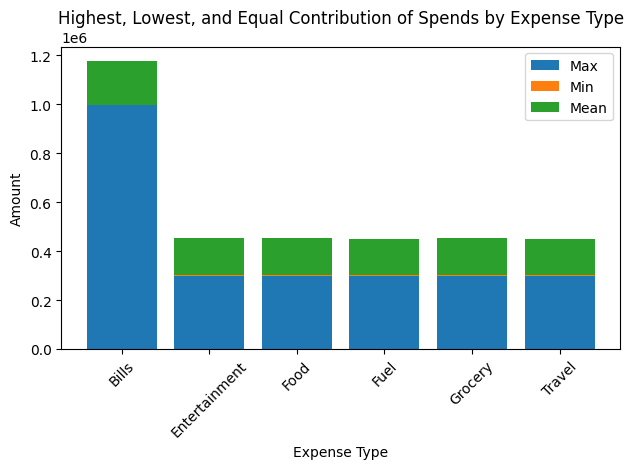

In [140]:
plt.bar(expense_type_summary['Exp Type'], expense_type_summary['max'], label='Max')
plt.bar(expense_type_summary['Exp Type'], expense_type_summary['min'], label='Min',bottom=expense_type_summary['max'] )
plt.bar(expense_type_summary['Exp Type'], expense_type_summary['mean'], label='Mean', bottom=expense_type_summary['max'] + expense_type_summary['min'])
plt.xticks(rotation=45)
plt.legend(['Max', 'Min', 'Mean'])
plt.title('Highest, Lowest, and Equal Contribution of Spends by Expense Type')
plt.xlabel('Expense Type')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [141]:
# Task-6 (Gender and Expense Type Combination with Highest Month-over-Month Growth in Jan 2014)
jan_2014_data = df[(df['Date'] >= '2014-01-01') & (df['Date'] < '2014-02-01')]
jan_2014_group = jan_2014_data.groupby(['Gender', 'Exp Type'])['Amount'].sum().reset_index()
jan_2014_growth = jan_2014_group.sort_values(by='Amount', ascending=False).head(1)
print(jan_2014_growth)

  Gender Exp Type    Amount
0      F    Bills  25114249


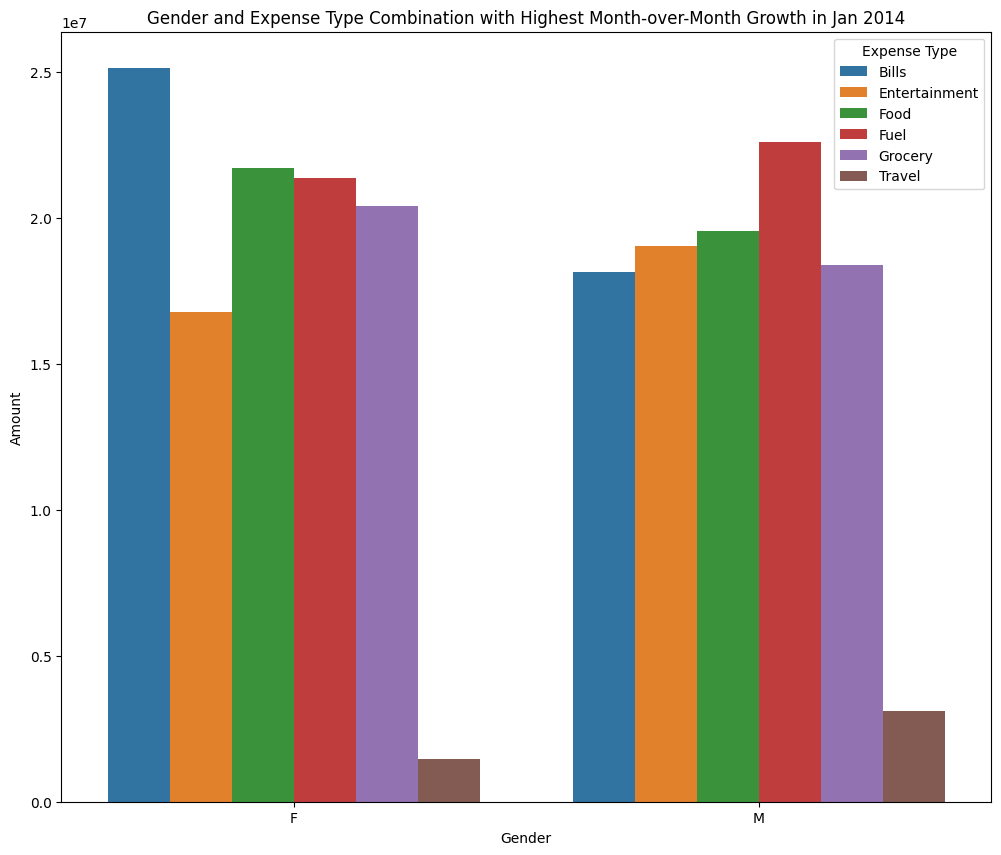

In [142]:
plt.figure(figsize=(12, 10))
sns.barplot(x='Gender', y='Amount', hue='Exp Type', data=jan_2014_group)
plt.legend(title='Expense Type')
plt.title('Gender and Expense Type Combination with Highest Month-over-Month Growth in Jan 2014')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()

In [143]:
# Task-7 (Weekends with Highest Total Spend in a Transaction's Ratio)
df['Weekday'] = df['Date'].dt.weekday
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
weekend_spends = df.groupby('Is_Weekend')['Amount'].sum().reset_index()
total_spends = df['Amount'].sum()
weekend_spends['Ratio'] = weekend_spends['Amount'] / total_spends
weekend_ratio = weekend_spends.loc[weekend_spends['Is_Weekend'] == 1]
print(weekend_ratio)

   Is_Weekend      Amount     Ratio
1           1  1184458337  0.290677


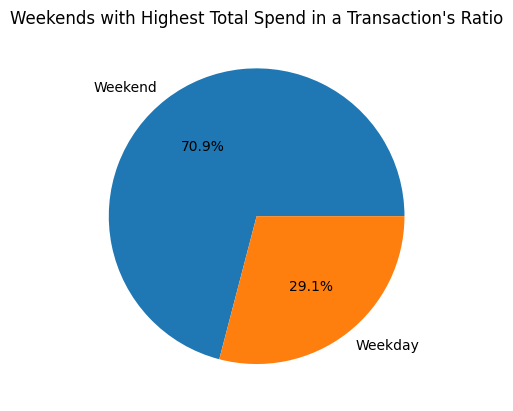

In [144]:
plt.pie(weekend_spends['Ratio'], labels=['Weekend', 'Weekday'], autopct='%1.1f%%')
plt.title('Weekends with Highest Total Spend in a Transaction\'s Ratio')
plt.show()

In [145]:
# Task-8 (Day of the Week with Highest Spend to Total No. of Transactions Ratio)
day_spends = df.groupby('Weekday')['Amount'].sum().reset_index()
day_transactions = df.groupby('Weekday').size().reset_index(name='Transactions')
day_ratio = pd.merge(day_spends, day_transactions, on='Weekday')
day_ratio['Ratio'] = day_ratio['Amount'] / day_ratio['Transactions']
day_ratio['Spend to Transaction Ratio'] = day_ratio['Amount'] / day_ratio['Transactions']
highest_day_ratio = day_ratio.sort_values(by='Spend to Transaction Ratio', ascending=False).head(1)
print(highest_day_ratio)

   Weekday     Amount  Transactions          Ratio  Spend to Transaction Ratio
1        1  588289572          3697  159126.202867               159126.202867


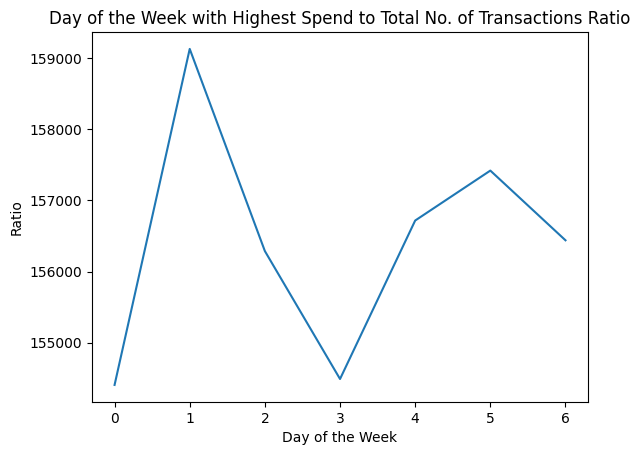

In [146]:
sns.lineplot(x='Weekday', y='Ratio', data=day_ratio)
plt.title('Day of the Week with Highest Spend to Total No. of Transactions Ratio')
plt.xlabel('Day of the Week')
plt.ylabel('Ratio')
plt.show()

In [147]:
# Task-9 (City Reaching 500th Transaction Fastest)
df['Transaction Count'] = df.groupby('City').cumcount() + 1
city_500th_transaction = df[df['Transaction Count'] == 500].sort_values(by='Date').head(1)
print(city_500th_transaction)

       index          City       Date Card Type Exp Type Gender  Amount  \
23918  23918  Surat, India 2013-11-05    Silver     Food      M  145588   

      Month-Year  Cumulative Amount  Weekday  Is_Weekend  Transaction Count  
23918    2013-11          993997172        1           0                500  


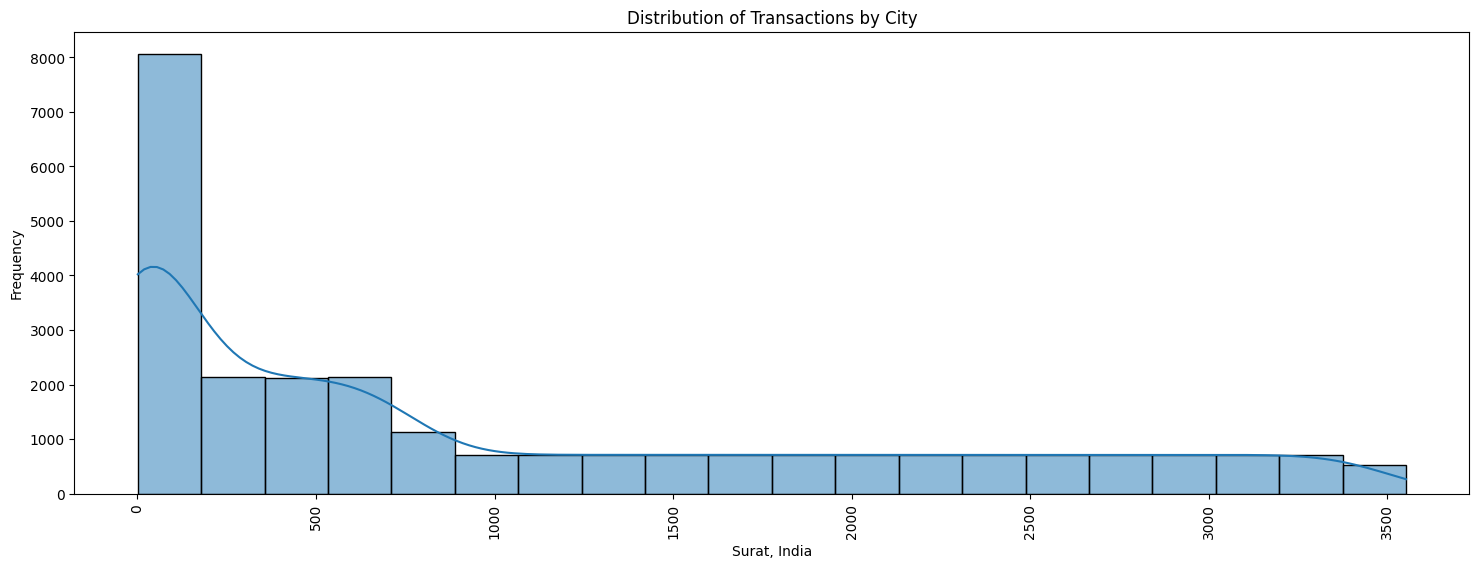

In [148]:
plt.figure(figsize=(18,6))
sns.histplot(df['Transaction Count'], bins=20, kde=True)
plt.xticks(rotation=90)
plt.title('Distribution of Transactions by City')
city_label = df[df['Transaction Count'] == 500].sort_values(by='Date').iloc[0]['City']
plt.xlabel(city_label)  # Set the city name as the x-axis label
plt.ylabel('Frequency')
plt.show()